In [6]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.style as style

In [7]:
def get_total_hours(stringHMS):
    timedeltaObj = dt.datetime.strptime(stringHMS, "%Hh %Mm %Ss") - dt.datetime(1900,1,1)
    return (timedeltaObj.total_seconds())/3600

In [8]:
def parse_logs(file):
    with open(file, 'r') as f:
        logs = f.read()
    episodes = []
    epsilon = []
    network_updates = []
    mean_rewards = []
    mean_lengths = []
    times = []
    for line in logs.split('\n')[:-1]:
        datum = line.split(', ')
        time = get_total_hours(datum[0].split(':')[1].strip())
        episode = int(datum[1].split(':')[1])
        eps = float(datum[2].split(':')[1])
        nu = int(datum[3].split(':')[1])
        emr = float(datum[4].split(':')[1])
        eml = float(datum[5].split(':')[1])
        episodes.append(episode)
        epsilon.append(eps)
        network_updates.append(nu)
        mean_rewards.append(emr)
        mean_lengths.append(eml)
        times.append(time)
        
    return episodes, epsilon, network_updates, mean_rewards, mean_lengths, times

In [13]:
def plot_compare_graph(episodes1, epsilon1, network_updates1, mean_rewards1, mean_lengths1, times1, episodes2, epsilon2, network_updates2, mean_rewards2, mean_lengths2, times2, graph_title, save_graph_title):
    fig, ax = plt.subplots(2, 2, figsize=(16,16))
    ax[0][0].plot(episodes1, mean_rewards1, color='blue', lw=1, label='Scratch')
    ax[0][0].plot(episodes2, mean_rewards2, color='violet', lw=1, label='Transfer')
    ax[0][0].set_title('Mean Rewards per 100 episodes', fontsize=16)
    ax[0][0].set_xlabel('Number of episodes', fontsize=12)
    ax[0][0].set_ylabel('mean_rewards', fontsize=12)
    ax[0][0].legend(loc='lower right');

    ax[0][1].plot(episodes1, mean_lengths1, color='green', lw=1, label='Scratch')
    ax[0][1].plot(episodes2, mean_lengths2, color='blue', lw=1, label='Transfer')
    ax[0][1].set_title('Mean length per 100 episodes', fontsize=16)
    ax[0][1].set_xlabel('Number of episodes', fontsize=12)
    ax[0][1].set_ylabel('mean_length', fontsize=12)
    ax[0][1].legend(loc='lower right');

    ax[1][0].plot(episodes1, network_updates1, color='red', lw=1, label='Scratch')
    ax[1][0].plot(episodes2, network_updates2, color='green', lw=1, label='Transfer')
    ax[1][0].set_title('Number of network updates', fontsize=16)
    ax[1][0].set_xlabel('Number of episodes', fontsize=12)
    ax[1][0].set_ylabel('network_updates', fontsize=12)
    ax[1][0].legend(loc='lower right');
    
    ax[1][1].plot(episodes1, times1, color='violet', lw=1, label='Freeze-2')
    ax[1][1].plot(episodes2, times2, color='red', lw=1, label='Freeze-0')
    ax[1][1].set_title('Time to train per 100 episodes', fontsize=16)
    ax[1][1].set_xlabel('Number of episodes', fontsize=12)
    ax[1][1].set_ylabel('time_to_train', fontsize=12)
    ax[1][1].legend(loc='lower right');
    

    #plt.tight_layout()
    plt.suptitle(f'{graph_title}', fontsize=20)
    fig.savefig(f'./plots/{save_graph_title}.png')
    #plt.show()

In [16]:
scratch_filename = input("Enter path to scratch combined log: ")
transfer_filename = input("Enter path to transfer combined log: ")
graph_title = input("Enter title for graph: ")
save_graph_title = input("Enter filename to save graph in: ")

In [14]:
episodes1, epsilon1, network_updates1, mean_rewards1, mean_lengths1, times1 = parse_logs(scratch_filename)
episodes2, epsilon2, network_updates2, mean_rewards2, mean_lengths2, times2 = parse_logs(transfer_filename)

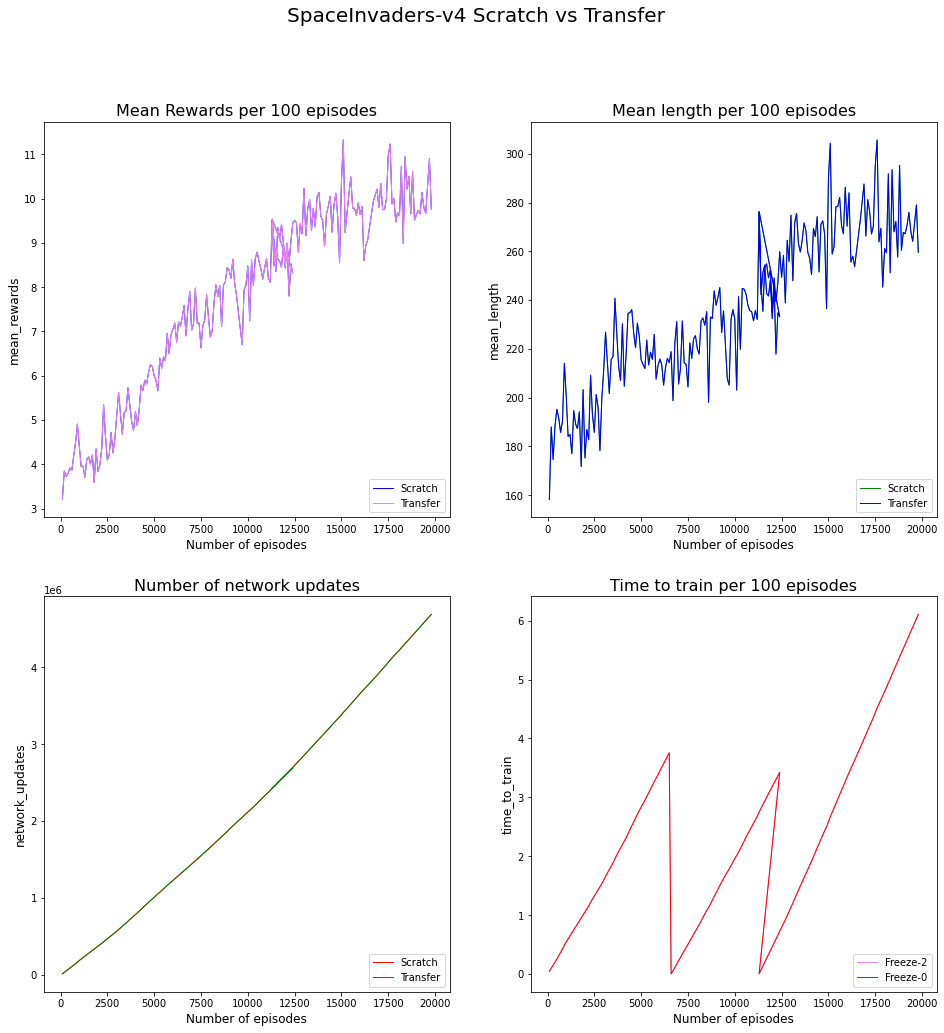

In [15]:
plot_compare_graph(episodes1, epsilon1, network_updates1, mean_rewards1, mean_lengths1, times1, episodes2, epsilon2, network_updates2, mean_rewards2, mean_lengths2, times2, graph_title, save_graph_title)